In [63]:
import numpy as np

from typing import Callable
from numpy import ndarray as Matrix
from time import time
import matplotlib.pyplot as plt

In [64]:
def multiply_classic(A: Matrix, B: Matrix):
    """
    Multiplies `A` times `B` with a classic algorithm, where 
    `A` is an `m x n` matrix and `B` is an `n x l` matrix.
    """

    m, n, l = A.shape[0], A.shape[1], B.shape[1]
    multiply = np.empty((m, l))
    sum = 0
    for i in range(m):                      # rows in multiply
        for j in range(l):                  # columns in multiply
            for k in range(n):              # columns in A and rows in B
                sum += A[i, k] * B[k, j]
            multiply[i, j] = sum
            sum = 0

    return multiply

Input: $A$ - $m$ x $n$, $B$ - $n$ x $l$  
$FLO_{classic}(m, n, l) =$  
$= \sum_{i=0}^m \sum_{j=0}^l \sum_{k=0}^n (1_{add} + 1_{mul}) =$  
$= 1_{add}mnl + 1_{mul}mnl =$  
$= 2mnl$

In [65]:
def multiply_strassen(A: Matrix, B: Matrix):
    """
    Multiplies `A` times `B` with a Strassen algorithm, where
    both `A` and `B` are square `n x n` matrices.
    """

    def strassen(A: Matrix, B: Matrix, n: int):

        if n == 1:
            return A * B
        
        m = n // 2

        A11 = A[:m, :m]
        A12 = A[:m, m:]
        A21 = A[m:, :m]
        A22 = A[m:, m:]

        B11 = B[:m, :m]
        B12 = B[:m, m:]
        B21 = B[m:, :m]
        B22 = B[m:, m:]

        P1 = strassen(A11 + A22, B11 + B22, m)
        P2 = strassen(A21 + A22, B11, m)
        P3 = strassen(A11, B12 - B22, m)
        P4 = strassen(A22, B21 - B11, m)
        P5 = strassen(A11 + A12, B22, m)
        P6 = strassen(A21 - A11, B11 + B12, m)
        P7 = strassen(A12 - A22, B21 + B22, m)

        C = np.concatenate((
            np.concatenate((P1 + P4 - P5 + P7, P3 + P5), axis=1),
            np.concatenate((P2 + P4, P1 - P2 + P3 + P6), axis=1)
        ), axis=0)

        return C

    return strassen(A, B, A.shape[0])


Input: $A$ - $n$ x $n$, $B$ - $n$ x $n$ and $n = 2^k => k = \log_2{n}$   
$FLO_{Strassen}(1) = 1_{mul}$  
$FLO_{Strassen}(2^k) =$   
$= (2_{add} * 2^{k-1} + FLO_{Strassen}(2^{k-1})) + (1_{add} * 2^{k-1} + FLO_{Strassen}(2^{k-1})) + (1_{add} * 2^{k-1} + FLO_{Strassen}(2^{k-1})) + (1_{add} * 2^{k-1} + FLO_{Strassen}(2^{k-1})) + (1_{add} * 2^{k-1} + FLO_{Strassen}(2^{k-1})) + (2_{add} * 2^{k-1} + FLO_{Strassen}(2^{k-1})) + (2_{add} * 2^{k-1} + FLO_{Strassen}(2^{k-1})) + 8_{add} * 2^{k-1} =$  
$= 18_{add} * 2^{k-1} + 7 * FLO_{Strassen}(2^{k-1}) =$  
$= 18_{add} * 2^{k-1} + 7 * (18_{add} * 2^{k-2} + 7 * FLO_{Strassen}(2^{k-2})) =$  
$= 7^0 * 18_{add} * 2^{k-1} + 7 * 18_{add} * 2^{k-2} + 7^2 * 18_{add} * 2^{k-3} + 7^3 * 18_{add} * 2^{k-4} + ... + 7^{k-1} * 18_{add} * 2^{k-k} + 7^k * 1_{mul} =$  
$= \sum_{i=0}^{k-1} (7^i * 18_{add} * 2^{k-i-1}) + 7^k * 1_{mul} =$  
$= -\frac{18}{5}(2^k - 7^k) * 1_{add} + 7^k * 1_{mul} =$  
$= \frac{23}{5} * 7^k - \frac{18}{5} * 2^k =$  
$= \frac{23}{5} 7^{\log_2{n}} - \frac{18}{5} n$

In [66]:
def test_multiplication(multiplication_algorithm: Callable, A: Matrix | None = None, B: Matrix | None = None, **kwargs: dict):

    print(f"=== Testing {multiplication_algorithm.__name__} algorithm ===")

    A = np.reshape(np.arange(1, 4 * 4 + 1), (4, 4)) if not A else A
    B = np.reshape(np.arange(17, 4 * 4 + 17), (4, 4)) if not B else B

    assert A.shape == B.shape and A.shape[0] == A.shape[1], "Matrices are not square!"
    assert np.isclose(np.log2(A.shape[0]) % 1, 0), "Matrices size is not a power of 2!"
    
    AB = multiplication_algorithm(A, B, **kwargs)
    AB_numpy = A @ B

    print(f"\nMatrix A:\n{A}")
    print(f"\nMatrix B:\n{B}")
    print(f"\nMatrix AxB:\n{AB}")
    print(f"\nMatrix AxB (numpy):\n{AB_numpy}")

    assert np.array_equal(AB, AB_numpy), "Results are inconsistent! Check your algorithm!"

    print("\nTest Passed!")

In [67]:
test_multiplication(multiply_classic)

=== Testing multiply_classic algorithm ===

Matrix A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Matrix B:
[[17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]

Matrix AxB:
[[ 250.  260.  270.  280.]
 [ 618.  644.  670.  696.]
 [ 986. 1028. 1070. 1112.]
 [1354. 1412. 1470. 1528.]]

Matrix AxB (numpy):
[[ 250  260  270  280]
 [ 618  644  670  696]
 [ 986 1028 1070 1112]
 [1354 1412 1470 1528]]

Test Passed!


In [68]:
test_multiplication(multiply_strassen)

=== Testing multiply_strassen algorithm ===

Matrix A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Matrix B:
[[17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]

Matrix AxB:
[[ 250  260  270  280]
 [ 618  644  670  696]
 [ 986 1028 1070 1112]
 [1354 1412 1470 1528]]

Matrix AxB (numpy):
[[ 250  260  270  280]
 [ 618  644  670  696]
 [ 986 1028 1070 1112]
 [1354 1412 1470 1528]]

Test Passed!


In [69]:
def multiply_strassen_with_classic(A: Matrix, B: Matrix, size_classic: int = 1):
    """
    Multiplies `A` times `B` with a Strassen algorithm, where
    both `A` and `B` are square `n x n` matrices.
    If submatrix size is less or equal than `size_classic` uses `multiply_classic`.
    """

    def strassen(A: Matrix, B: Matrix, n: int):

        if n == 1:
            return A * B
        elif n <= size_classic:
            return multiply_classic(A, B)
        
        m = n // 2

        A11 = A[:m, :m]
        A12 = A[:m, m:]
        A21 = A[m:, :m]
        A22 = A[m:, m:]

        B11 = B[:m, :m]
        B12 = B[:m, m:]
        B21 = B[m:, :m]
        B22 = B[m:, m:]

        P1 = strassen(A11 + A22, B11 + B22, m)
        P2 = strassen(A21 + A22, B11, m)
        P3 = strassen(A11, B12 - B22, m)
        P4 = strassen(A22, B21 - B11, m)
        P5 = strassen(A11 + A12, B22, m)
        P6 = strassen(A21 - A11, B11 + B12, m)
        P7 = strassen(A12 - A22, B21 + B22, m)

        C = np.concatenate((
            np.concatenate((P1 + P4 - P5 + P7, P3 + P5), axis=1),
            np.concatenate((P2 + P4, P1 - P2 + P3 + P6), axis=1)
        ), axis=0)

        return C
    
    if A.shape[0] <= size_classic:
        return multiply_classic(A, B)

    return strassen(A, B, A.shape[0])


In [70]:
test_multiplication(multiply_strassen_with_classic, size_classic=2)

=== Testing multiply_strassen_with_classic algorithm ===

Matrix A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Matrix B:
[[17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]

Matrix AxB:
[[ 250.  260.  270.  280.]
 [ 618.  644.  670.  696.]
 [ 986. 1028. 1070. 1112.]
 [1354. 1412. 1470. 1528.]]

Matrix AxB (numpy):
[[ 250  260  270  280]
 [ 618  644  670  696]
 [ 986 1028 1070 1112]
 [1354 1412 1470 1528]]

Test Passed!


In [71]:
def multiply_classic_FLO(A: Matrix, B: Matrix):
    """
    Multiplies `A` times `B` with a classic algorithm, where 
    `A` is an `m x n` matrix and `B` is an `n x l` matrix.
    """

    FLO = 0
    m, n, l = A.shape[0], A.shape[1], B.shape[1]
    multiply = np.empty((m, l))
    sum = 0
    for i in range(m):                      # rows in multiply
        for j in range(l):                  # columns in multiply
            for k in range(n):              # columns in A and rows in B
                sum += A[i, k] * B[k, j]
                FLO += 2
            multiply[i, j] = sum
            sum = 0

    return multiply, FLO

In [72]:
def multiply_strassen_with_classic_FLO(A: Matrix, B: Matrix, size_classic: int = 1):
    """
    Multiplies `A` times `B` with a Strassen algorithm, where
    both `A` and `B` are square `n x n` matrices.
    If submatrix size is less or equal than `size_classic` uses `multiply_classic`.
    """

    def strassen(A: Matrix, B: Matrix, n: int):

        if n == 1:
            FLO[0] += 1
            return A * B
        elif n <= size_classic:
            res, flo = multiply_classic_FLO(A, B)
            FLO[0] += flo
            return res
        
        m = n // 2

        A11 = A[:m, :m]
        A12 = A[:m, m:]
        A21 = A[m:, :m]
        A22 = A[m:, m:]

        B11 = B[:m, :m]
        B12 = B[:m, m:]
        B21 = B[m:, :m]
        B22 = B[m:, m:]

        P1 = strassen(A11 + A22, B11 + B22, m)
        P2 = strassen(A21 + A22, B11, m)
        P3 = strassen(A11, B12 - B22, m)
        P4 = strassen(A22, B21 - B11, m)
        P5 = strassen(A11 + A12, B22, m)
        P6 = strassen(A21 - A11, B11 + B12, m)
        P7 = strassen(A12 - A22, B21 + B22, m)

        FLO[0] += m * m * 10

        C = np.concatenate((
            np.concatenate((P1 + P4 - P5 + P7, P3 + P5), axis=1),
            np.concatenate((P2 + P4, P1 - P2 + P3 + P6), axis=1)
        ), axis=0)

        FLO[0] += m * m * 8

        return C
    
    if A.shape[0] <= size_classic:
        return multiply_classic_FLO(A, B)
    
    FLO = [0]

    return strassen(A, B, A.shape[0]), FLO[0]

In [73]:
def experiment(L, K=10):
    l_size = len(L)
    fig, ax = plt.subplots(l_size+1, 2, figsize=(15, 23))
    fig.suptitle(f"Eksperyment mnożenia macierzy dla k = 2, 3, ... {K} i l = {L}", y=1.005)

    for i, l in enumerate(L):
        size_classic = pow(2, l)
        size_arr = []
        time_arr = []
        flo_arr = []
        for k in range(2, K+1):
            print(f"*** Eksperyment: k={k} l={l}***")
            size = pow(2, k)
            A = np.random.random((size, size))
            B = np.random.random((size, size))

            start = time()
            multiply_strassen_with_classic(A, B, size_classic=size_classic)
            end = time()

            _, flo = multiply_strassen_with_classic_FLO(A, B, size_classic=size_classic)

            size_arr.append(size)
            time_arr.append(end - start)
            flo_arr.append(flo)
        label = f"l = {l}"
        ax[i, 0].plot(size_arr, time_arr, label=label)
        ax[i, 0].set_ylabel("czas t [s]")

        ax[i, 1].plot(size_arr, flo_arr, label=label)
        ax[i, 1].set_ylabel("liczba operacji - FLO")

        ax[l_size, 0].plot(size_arr, time_arr, label=label)
        ax[l_size, 1].plot(size_arr, flo_arr, label=label)
    ax[0, 0].set_title(f"Czas mnożenia macierzy")
    ax[0, 1].set_title(f"Liczba operacji zmiennoprzecinkowych")

    ax[l_size, 0].legend()
    ax[l_size, 0].set_ylabel("czas t [s]")
    ax[l_size, 1].legend()
    ax[l_size, 1].set_ylabel("liczba operacji - FLO")
    
    fig.tight_layout()
    plt.show()

*** Eksperyment: k=2 l=0***
*** Eksperyment: k=3 l=0***
*** Eksperyment: k=4 l=0***
*** Eksperyment: k=5 l=0***
*** Eksperyment: k=6 l=0***
*** Eksperyment: k=7 l=0***
*** Eksperyment: k=8 l=0***
*** Eksperyment: k=9 l=0***
*** Eksperyment: k=2 l=3***
*** Eksperyment: k=3 l=3***
*** Eksperyment: k=4 l=3***
*** Eksperyment: k=5 l=3***
*** Eksperyment: k=6 l=3***
*** Eksperyment: k=7 l=3***
*** Eksperyment: k=8 l=3***
*** Eksperyment: k=9 l=3***
*** Eksperyment: k=2 l=6***
*** Eksperyment: k=3 l=6***
*** Eksperyment: k=4 l=6***
*** Eksperyment: k=5 l=6***
*** Eksperyment: k=6 l=6***
*** Eksperyment: k=7 l=6***
*** Eksperyment: k=8 l=6***
*** Eksperyment: k=9 l=6***
*** Eksperyment: k=2 l=7***
*** Eksperyment: k=3 l=7***
*** Eksperyment: k=4 l=7***
*** Eksperyment: k=5 l=7***
*** Eksperyment: k=6 l=7***
*** Eksperyment: k=7 l=7***
*** Eksperyment: k=8 l=7***
*** Eksperyment: k=9 l=7***
*** Eksperyment: k=2 l=9***
*** Eksperyment: k=3 l=9***
*** Eksperyment: k=4 l=9***
*** Eksperyment: k=5

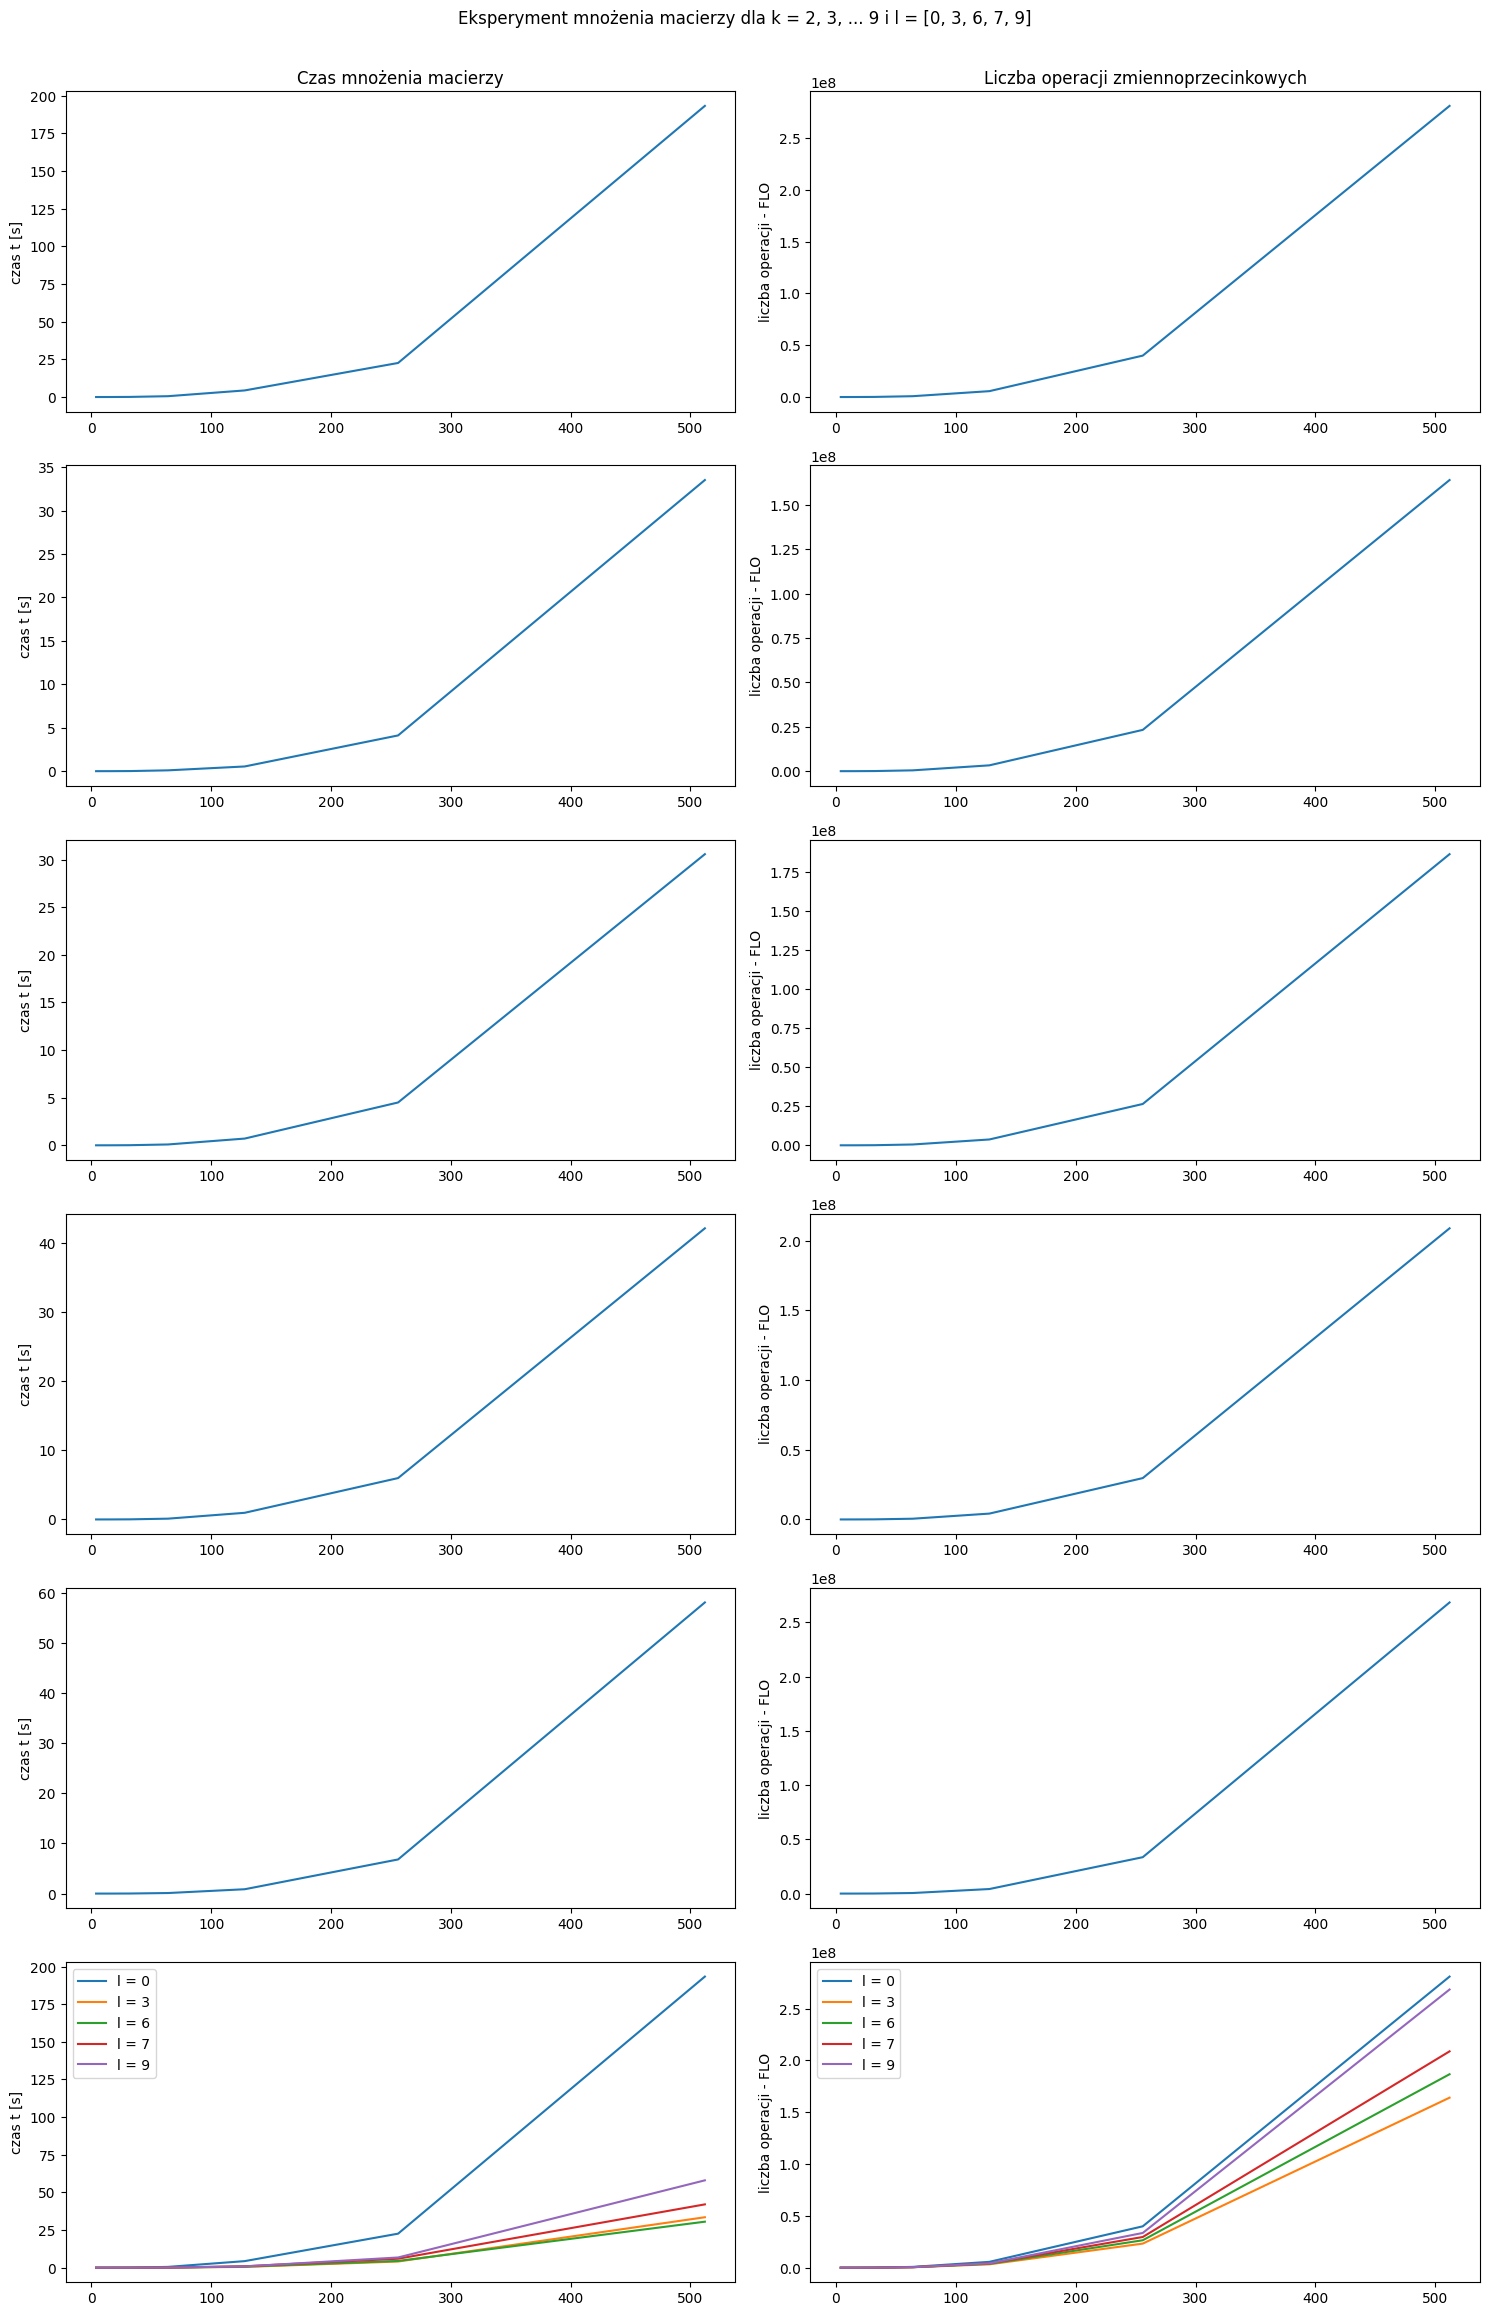

In [74]:
experiment([0, 3, 6, 7, 9], 9)